In [1]:
import pandas as pd
import os
import sys
from datetime import datetime

import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from mizani.formatters import percent_format
from plotnine import *

import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('films2020_2021_2022_clean.csv', encoding='utf-8-sig',sep=";")
df

,Titre,genre1,genre2,réalisateur_1,actor_1,actor_2,actor_3,note_presse,note_spectators,Scenar,...,language,real_awards,first_actor_awards,second_actor_awards,length_corrected,day,month,year,note_spectator_word,nomi
0,#No_Filter,Epouvante-horreur,Thriller,Michael Dupret,Hannah McIver,Jasmine Daoud,Samuel Van der Zwalmen,NaN,1.6,NaN,...,Anglais,0.0,0.0,0.0,87,5,mai,2023,bad,0
1,13 : La comédie musicale,Drame,Famille,Tamra Davis,Eli Golden,Josh Peck,Debra Messing,NaN,2.6,Robert Horn,...,Anglais,1.0,0.0,0.0,94,12,août,2022,soso,0
2,16 ans,Drame,Romance,Philippe Lioret,Sabrina Levoye,Teïlo Azaïs,Jean-Pierre Lorit,3.2,3.6,Philippe Lioret,...,Français,4.0,0.0,0.0,94,4,janvier,2023,good,1
3,1UP,Comédie,NaN,Kyle Newman,Paris Berelc,Taylor Zakhar Perez,Ruby Rose,NaN,2.2,Julia Yorks,...,Anglais,0.0,0.0,0.0,100,15,juillet,2022,soso,0
4,365 jours : Au lendemain,Drame,Erotique,Barbara Bialowas,Michele Morrone,Anna-Maria Sieklucka,Simone Susinna,NaN,1.2,Tomasz Mandes,...,Anglais,0.0,0.0,0.0,106,27,avril,2022,bad,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3279,White Building,Drame,NaN,Kavich Neang,Piseth Chhun,Sithan Hout,Sokha Uk,3.5,2.8,Kavich Neang,...,Khmer,0.0,0.0,0.0,90,22,décembre,2021,soso,4
3280,Who's the Boss,Comédie,Romance,Chinaza Onuzo,Funke Akindele,Blossom Chukwujekwu,Sharon Ooja,NaN,2.9,NaN,...,Anglais,0.0,0.0,0.0,105,25,octobre,2022,soso,0
3281,Why Moths Fly to the Light?,Drame,NaN,Zaur Dzhafarov,Anita Shmatova,Arthur Valente,NaN,NaN,3.0,NaN,...,ukrainien,0.0,0.0,0.0,62,15,mars,2021,soso,0
3282,Wildland,Policier,Thriller,Jeanette Nordahl,Sandra Guldberg Kampp,Sidse Babett Knudsen,Joachim Fjelstrup,NaN,1.9,Ingeborg Topsøe,...,Danois,0.0,0.0,1.0,88,9,novembre,2021,bad,0


In [3]:
df.columns

Index(['Titre', 'genre1', 'genre2', 'réalisateur_1', 'actor_1', 'actor_2',
       'actor_3', 'note_presse', 'note_spectators', 'Scenar', 'nationality_1',
       'distributor', 'language', 'real_awards', 'first_actor_awards',
       'second_actor_awards', 'length_corrected', 'day', 'month', 'year',
       'note_spectator_word', 'nomi'],
      dtype='object')

In [4]:
df.dtypes

Titre                   object
genre1                  object
genre2                  object
réalisateur_1           object
actor_1                 object
actor_2                 object
actor_3                 object
note_presse            float64
note_spectators        float64
Scenar                  object
nationality_1           object
distributor             object
language                object
real_awards            float64
first_actor_awards     float64
second_actor_awards    float64
length_corrected         int64
day                      int64
month                   object
year                     int64
note_spectator_word     object
nomi                     int64
dtype: object

## Analysis by nationality

First without taking the success into account

In [5]:
#Analysis by nationality

#Number films by country on the years 2022 and 2021
nationalities=df.nationality_1.value_counts()
nationalities[0:10]

U.S.A.             1144
France              672
Inde                190
Grande-Bretagne     145
Allemagne           111
Canada              102
Italie               75
Japon                72
Espagne              72
Corée du Sud         38
Name: nationality_1, dtype: int64

In [6]:
#To have it in percentage
normalized_natio = df.nationality_1.value_counts(normalize=True)
normalized_natio

U.S.A.             0.348674
France             0.204816
Inde               0.057909
Grande-Bretagne    0.044194
Allemagne          0.033831
                     ...   
Côte-d'Ivoire      0.000305
Bénin              0.000305
Barbade            0.000305
Arabie Saoudite    0.000305
Cameroun           0.000305
Name: nationality_1, Length: 90, dtype: float64

# Graphs with all nationalities

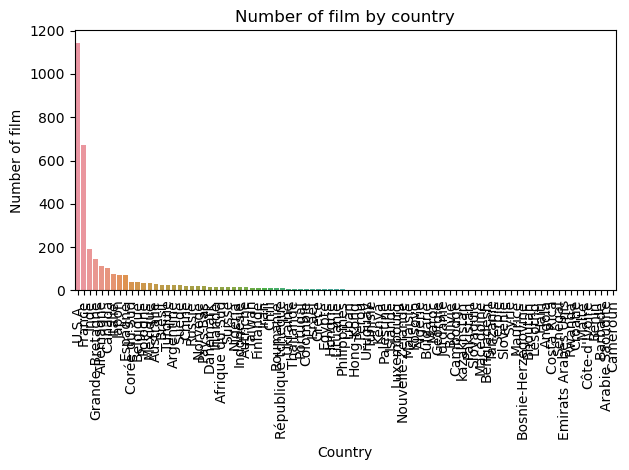

In [7]:
#In numbers
axis = sn.barplot(x=nationalities.index, y=nationalities.values)
plt.title("Number of film by country")
plt.xlabel("Country")
plt.ylabel("Number of film")
plt.rc('axes', labelsize=10)
plt.rc('xtick', labelsize=5) 
plt.xticks(rotation='vertical')
plt.tight_layout()

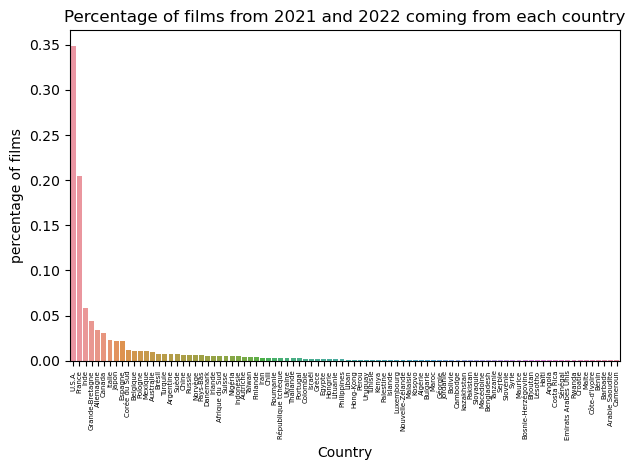

In [8]:
#In percentage
sn.barplot(x=normalized_natio.index, y=normalized_natio.values)
plt.title("Percentage of films from 2021 and 2022 coming from each country")
plt.xlabel("Country")
plt.ylabel("percentage of films")
plt.rc('axes', labelsize=10)
plt.rc('xtick', labelsize=5) 
plt.xticks(rotation='vertical')
plt.tight_layout()

Thanks to this analysis, one can see that some countries are major producers (USA, France, India, UK, Canada) With most films coming from the USA

# More readable graphs with only 10 first producers

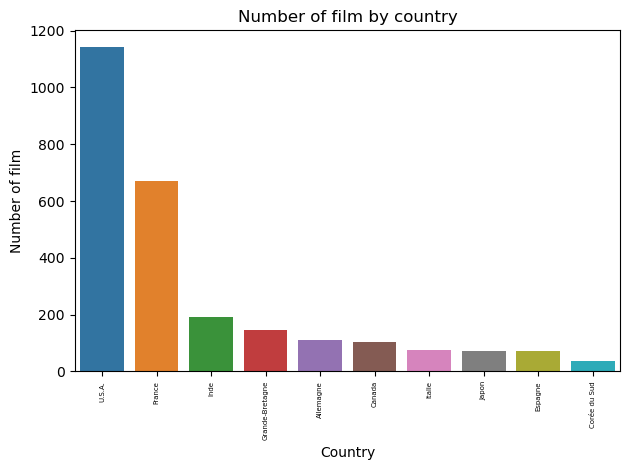

In [9]:
sn.barplot(x=nationalities[0:10].index, y=nationalities[0:10].values)
plt.title("Number of film by country")
plt.xlabel("Country")
plt.ylabel("Number of film")
plt.xticks(rotation='vertical')
plt.tight_layout()# to remove the computation

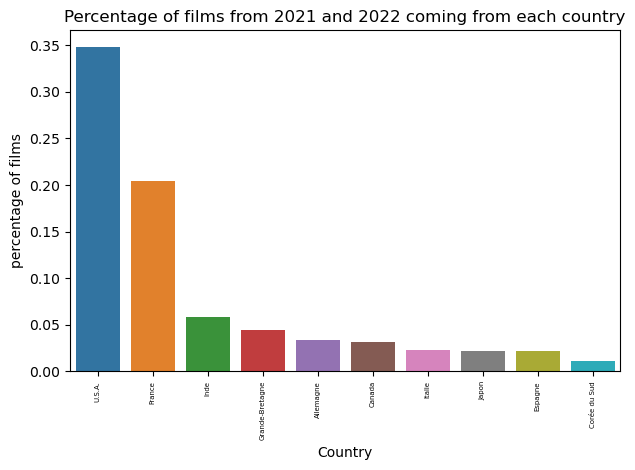

In [10]:
#In percentage
sn.barplot(x=normalized_natio[0:10].index, y=normalized_natio[0:10].values)
plt.title("Percentage of films from 2021 and 2022 coming from each country")
plt.xlabel("Country")
plt.ylabel("percentage of films")
plt.xticks(rotation='vertical')
plt.tight_layout()

We will now try to make some map to make the information with the countries more visual

In [11]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [12]:
#Get a dataset with geometry (so geographical position)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

C:\Users\User\AppData\Local\Temp\ipykernel_359748\3548753351.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.


In [13]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [14]:
#I will only need the geometry and name so the other features can be deleted
world=world.drop(["pop_est","continent","iso_a3","gdp_md_est"], axis=1)

In [15]:
world

,name,geometry
0,Fiji,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Tanzania,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,W. Sahara,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Canada,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,United States of America,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...
172,Serbia,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,Montenegro,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,Kosovo,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,Trinidad and Tobago,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [16]:
#We remove the films with no nationality as it would not be possible to plot it
df_sans_NA=df.dropna(axis=0, subset=['nationality_1']).reset_index(drop=True)

In [17]:
world=world.sort_values('name')

In [18]:
world.name.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antarctica',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herz.', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Central African Rep.', 'Chad', 'Chile',
       'China', 'Colombia', 'Congo', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czechia', "Côte d'Ivoire", 'Dem. Rep. Congo', 'Denmark',
       'Djibouti', 'Dominican Rep.', 'Ecuador', 'Egypt', 'El Salvador',
       'Eq. Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Falkland Is.',
       'Fiji', 'Finland', 'Fr. S. Antarctic Lands', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran',
       'Iraq', 

In [19]:
df_sans_NA["nationality_1"].unique()

array(['Belgique', 'U.S.A.', 'France', 'Canada', 'Pologne', 'Suisse',
       'Allemagne', 'Norvège', 'Espagne', 'Corée du Sud', 'Inde',
       'Grande-Bretagne', 'Turquie', 'Israël', 'Portugal',
       'Afrique du Sud', 'Nigéria', 'Grèce', 'Argentine', 'Tunisie',
       'Iran', 'Mexique', 'Pérou', 'Suède', 'Italie', 'Géorgie', 'Japon',
       'Ukraine', 'Chili', 'Autriche', 'Kenya', 'Philippines',
       'Costa Rica', 'Islande', 'Finlande', 'Danemark', 'Pays-Bas',
       'Russie', 'Thaïlande', 'Palestine', 'Irlande', 'Bengladesh',
       'Bulgarie', 'Taïwan', 'Australie', 'Pakistan', 'Colombie',
       'Macédoine', 'Algérie', 'Bénin', 'Chine', 'Brésil', 'Malaisie',
       'République tchèque', 'Liban', 'Barbade', 'Indonésie', 'Roumanie',
       'Arabie Saoudite', 'Egypte', 'Uruguay', 'Lituanie', 'Hong-Kong',
       'Slovaquie', 'Nouvelle-Zélande', 'Tanzanie', 'Maroc',
       'Emirats Arabes Unis', 'Hongrie', 'Jordanie', 'Luxembourg',
       'Kosovo', 'Bolivie', "Côte-d'Ivoire", 'Cambod

In [20]:
df_sans_NA["nationality_1"]=df_sans_NA["nationality_1"].replace({"Belgique":'Belgium','U.S.A.':'United States of America','France':'France', 'Pologne':'Poland'
                                                ,'Suisse':'Switzerland','Allemagne':'Germany','Norvège':'Norway','Espagne':'Spain',
                                                'Corée du Sud':'South Korea','Inde':"India",'Grande-Bretagne':'United Kingdom',
                                                'Turquie':'Turkey','Israël':'Israel','Portugal':'Portugal','Afrique du Sud':'South Africa',
                                                'Nigéria':'Nigeria','Grèce':'Greece','Argentine':'Argentina','Tunisie':'Tunisia','Iran':'Iran',
                                                'Mexique':'Mexico','Pérou':'Peru','Suède':'Sweden','Italie':'Italy','Géorgie':'Georgia',
                                                'Japon':'Japan','Ukraine':'Ukraine','Chili':'Chile','Autriche':'Austria','Kenya':'Kenya',
                                                'Philippines':'Philippines', 'Costa Rica':'Costa Rica','Islande':'Iceland','Finlande':'Finland',
                                                'Danemark':'Denmark','Pays-Bas':'Netherlands','Russie':'Russia','Thaïlande':'Thailand',
                                                'Palestine':'Palestine','Irlande':'Ireland','Bengladesh':'Bangladesh','Bulgarie':'Bulgaria','Taïwan':'Taiwan',
                                                'Australie':'Australia', 'Pakistan':'Pakistan','Colombie':'Colombia', 'Macédoine':'North Macedonia',
                                                 'Algérie':'Algeria', 'Bénin':'Benin', 'Chine':'China', 'Brésil':'Brazil','Malaisie':'Malaysia',
                                                 'République tchèque':'Czechia', 'Liban':'Lebanon', 'Barbade':'United States of America', 'Indonésie':'Indonesia',
                                                'Roumanie':'Romania', 'Arabie Saoudite':'Saudi Arabia', 'Egypte':'Egypt',
                                                 'Uruguay':'Uruguay', 'Lituanie':'Lithuania','Hong-Kong':'China', 'Slovaquie':'Slovakia',
                                                 'Nouvelle-Zélande':'New Zealand', 'Tanzanie':'Tanzania', 'Maroc':'Morocco',
                                                'Emirats Arabes Unis':'United Arab Emirates', 'Hongrie':'Hungary', 'Jordanie':'Jordan',
                                                 'Luxembourg':'Luxembourg','Kosovo':'Kosovo', 'Bolivie':'Bolivia', "Côte-d'Ivoire":"Côte d'Ivoire",
                                                 'Cambodge':'Cambodia', 'Malte':'N. Cyprus','Croatie':'Croatia',
                                                 'Rwanda':'Rwanda', 'kazakhstan':'Kazakhstan', 'Sénégal':'Senegal', 'Serbie':'Serbia', 'Angola':'Angola', 'Haïti':'Haiti',
                                                 'Lésotho': 'Lesotho', 'Bhoutan':'Bhutan', 'Bosnie-Herzégovine': 'Bosnia and Herz.', 'Maurice':'Mauritania',
                                                  'Syrie': 'Syria','Slovénie': 'Slovenia', 'Cameroun': 'Cameroon' })

In [21]:
df_sans_NA["nationality_1"].unique()

array(['Belgium', 'United States of America', 'France', 'Canada',
       'Poland', 'Switzerland', 'Germany', 'Norway', 'Spain',
       'South Korea', 'India', 'United Kingdom', 'Turkey', 'Israel',
       'Portugal', 'South Africa', 'Nigeria', 'Greece', 'Argentina',
       'Tunisia', 'Iran', 'Mexico', 'Peru', 'Sweden', 'Italy', 'Georgia',
       'Japan', 'Ukraine', 'Chile', 'Austria', 'Kenya', 'Philippines',
       'Costa Rica', 'Iceland', 'Finland', 'Denmark', 'Netherlands',
       'Russia', 'Thailand', 'Palestine', 'Ireland', 'Bangladesh',
       'Bulgaria', 'Taiwan', 'Australia', 'Pakistan', 'Colombia',
       'North Macedonia', 'Algeria', 'Benin', 'China', 'Brazil',
       'Malaysia', 'Czechia', 'Lebanon', 'Indonesia', 'Romania',
       'Saudi Arabia', 'Egypt', 'Uruguay', 'Lithuania', 'Slovakia',
       'New Zealand', 'Tanzania', 'Morocco', 'United Arab Emirates',
       'Hungary', 'Jordan', 'Luxembourg', 'Kosovo', 'Bolivia',
       "Côte d'Ivoire", 'Cambodia', 'N. Cyprus', 'Croatia

In [22]:
value_count=df_sans_NA["nationality_1"].value_counts()

In [23]:
new_df=pd.DataFrame(value_count)

In [24]:
new_df_reset = new_df.reset_index()
new_df_reset.columns = ['country', 'counts'] # change column names

In [25]:
new_df_reset

,country,counts
0,United States of America,1145
1,France,672
2,India,190
3,United Kingdom,145
4,Germany,111
...,...,...
83,Saudi Arabia,1
84,Côte d'Ivoire,1
85,Costa Rica,1
86,Tanzania,1


In [26]:
geomap= world.merge(new_df_reset,right_on='country', left_on="name")


In [27]:
geomap.sort_values('name')

,name,geometry,country,counts
0,Algeria,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948...",Algeria,3
1,Angola,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4...",Angola,1
2,Argentina,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...",Argentina,24
3,Australia,"MULTIPOLYGON (((147.68926 -40.80826, 148.28907...",Australia,31
4,Austria,"POLYGON ((16.97967 48.12350, 16.90375 47.71487...",Austria,14
...,...,...,...,...
83,Ukraine,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...",Ukraine,9
84,United Arab Emirates,"POLYGON ((51.57952 24.24550, 51.75744 24.29407...",United Arab Emirates,1
85,United Kingdom,"MULTIPOLYGON (((-6.19788 53.86757, -6.95373 54...",United Kingdom,145
86,United States of America,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States of America,1145


<AxesSubplot:>

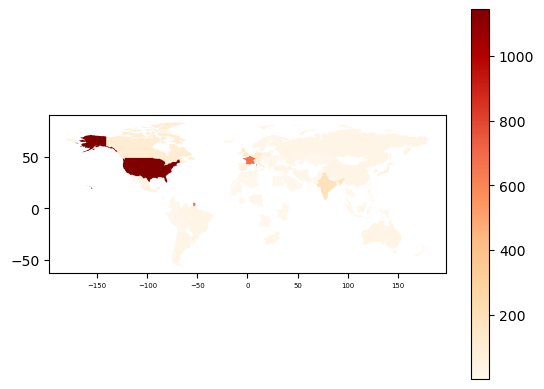

In [28]:
figure=geomap.plot(column="counts",cmap='OrRd', legend=True)
figure

# Most represented genres

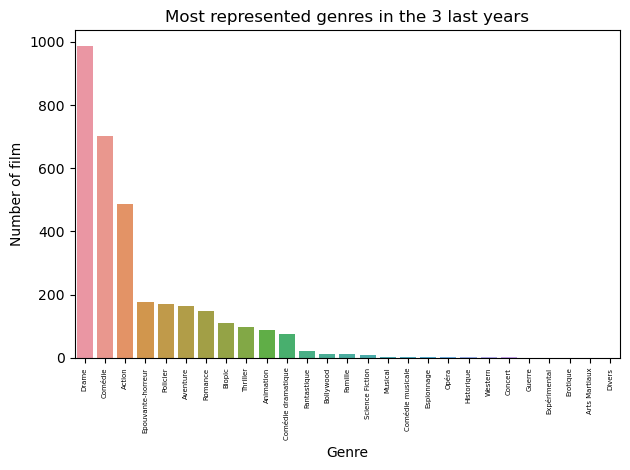

In [29]:
#In numbers
sn.barplot(x=df.genre1.value_counts().index, y=df.genre1.value_counts().values)
plt.title("Most represented genres in the 3 last years")
plt.xlabel("Genre")
plt.ylabel("Number of film")
plt.rc('axes', labelsize=10)
plt.rc('xtick', labelsize=5) 
plt.xticks(rotation='vertical')
plt.tight_layout()

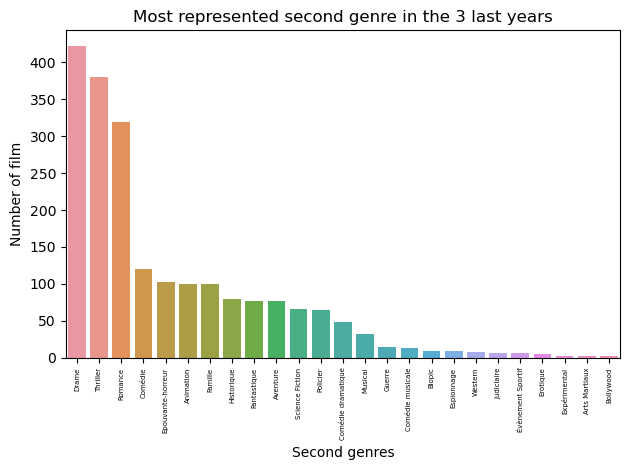

In [30]:
#In numbers
sn.barplot(x=df.genre2.value_counts().index, y=df.genre2.value_counts().values)
plt.title("Most represented second genre in the 3 last years")
plt.xlabel("Second genres")
plt.ylabel("Number of film")
plt.xticks(rotation='vertical')
plt.tight_layout()

We can observe that the most represented genre is Drame followed by Comédie and Action. Concerning the second genre, the most represented is still Drame then, Thriller and Romance

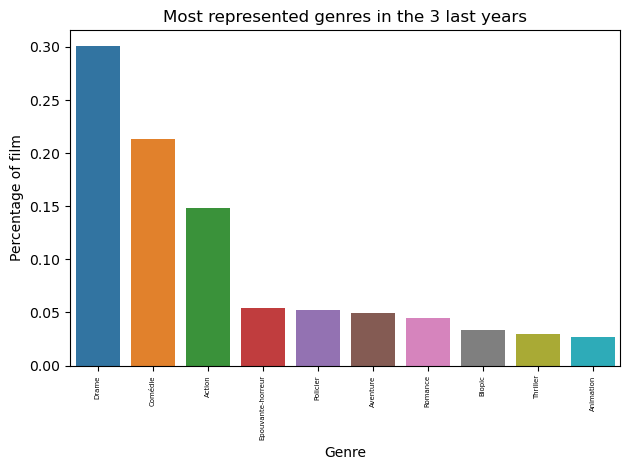

In [31]:
#In percentage with only the most represented ones
sn.barplot(x=df.genre1.value_counts(normalize=True)[0:10].index, y=df.genre1.value_counts(normalize=True)[0:10].values)
plt.title("Most represented genres in the 3 last years")
plt.xlabel("Genre")
plt.ylabel("Percentage of film")
plt.rc('axes', labelsize=10)
plt.rc('xtick', labelsize=5) 
plt.xticks(rotation='vertical')
plt.tight_layout()

# Length

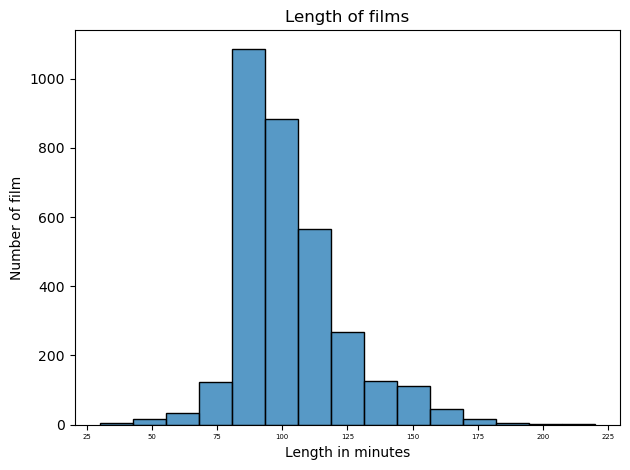

In [32]:
#In numbers
sn.histplot(x=df.length_corrected, bins=15, stat='count') #y=df.length_corrected.value_counts().values)
plt.title("Length of films")
plt.xlabel("Length in minutes")
plt.ylabel("Number of film")
plt.tight_layout()

# Actors

In [33]:
df.actor_1.value_counts()

Bruce Willis        15
Nicolas Cage         7
Virginie Efira       7
Liam Neeson          7
Tom Holland          6
                    ..
Carlos Aguillo       1
Kali Reis            1
Giovana Cordeiro     1
Edmilson Filho       1
Aurélien Osinski     1
Name: actor_1, Length: 2608, dtype: int64

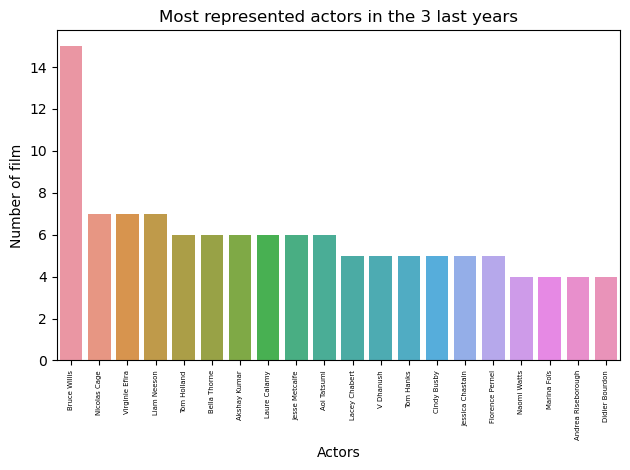

In [34]:
#In number with only the most represented ones
sn.barplot(x=df.actor_1.value_counts()[0:20].index, y=df.actor_1.value_counts()[0:20].values)
plt.title("Most represented actors in the 3 last years")
plt.xlabel("Actors")
plt.ylabel("Number of film")
plt.rc('axes', labelsize=10)
plt.rc('xtick', labelsize=5) 
plt.xticks(rotation='vertical')
plt.tight_layout()

# Let's now analyze a bit more the proportion of good films etc

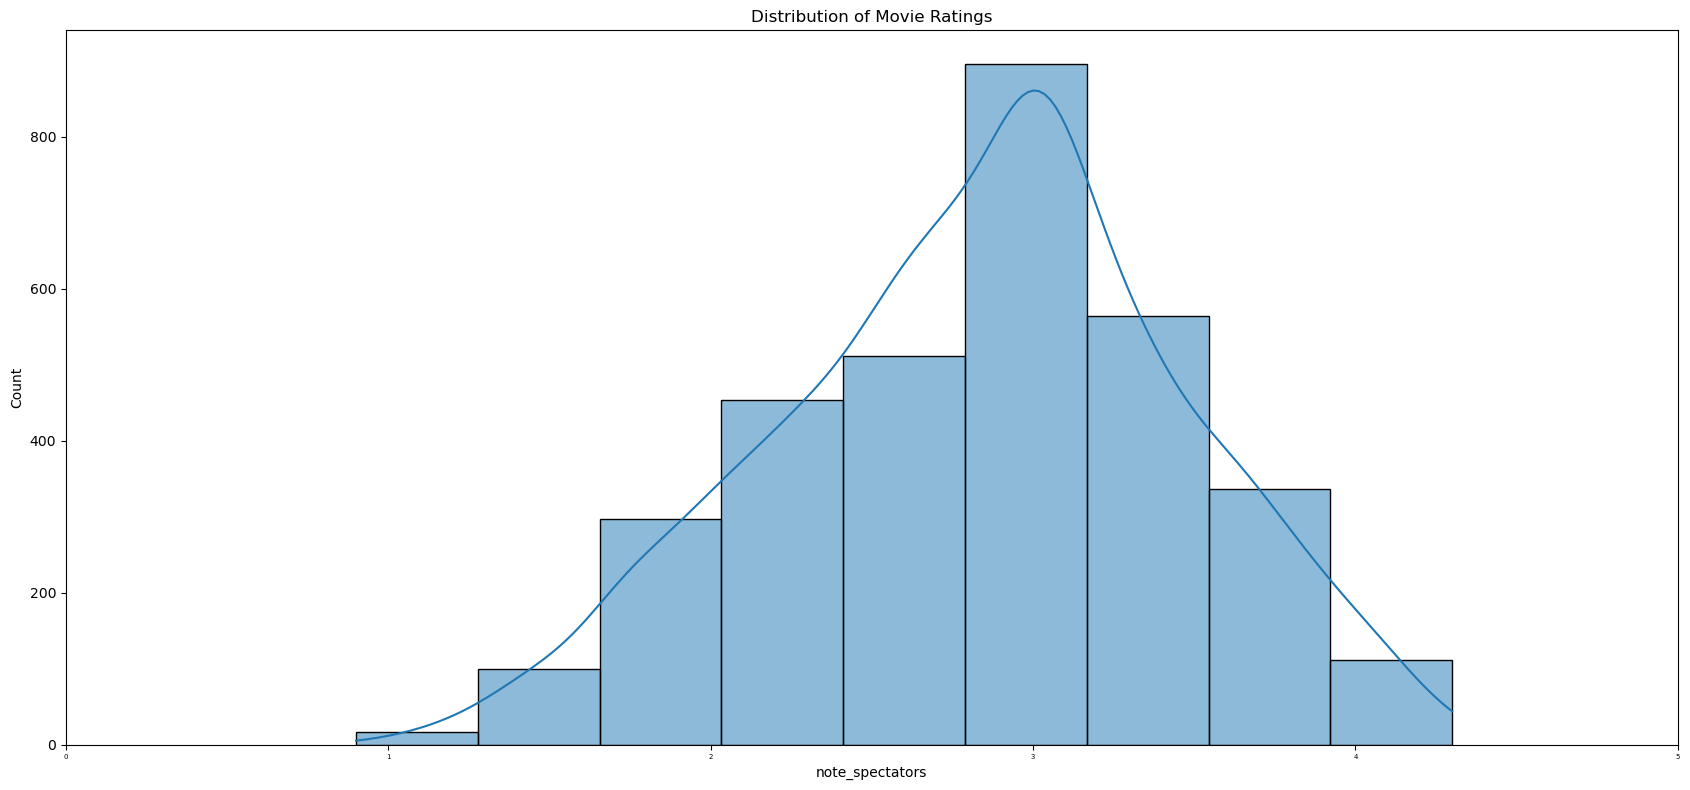

In [35]:
plt.figure(figsize=(17,8))
ax = sn.histplot(df['note_spectators'], bins=9, kde=True)
ax.set(xlim=(0, 5))
ax.set_title("Distribution of Movie Ratings")
plt.tight_layout()

As we can see the majority of the films have a rating of 3. Moreover, there is really few catastrophic films and only a bit more excellent ones

In [36]:
df.note_spectator_word.value_counts(normalize=True)*100

soso            49.847747
good            35.505481
bad             12.515225
excellent        2.040195
catastrophic     0.091352
Name: note_spectator_word, dtype: float64

We can thus see that more or less 85% of the films have a rating between 2 and 4. 

<AxesSubplot:xlabel='note_spectator_word', ylabel='Percent'>

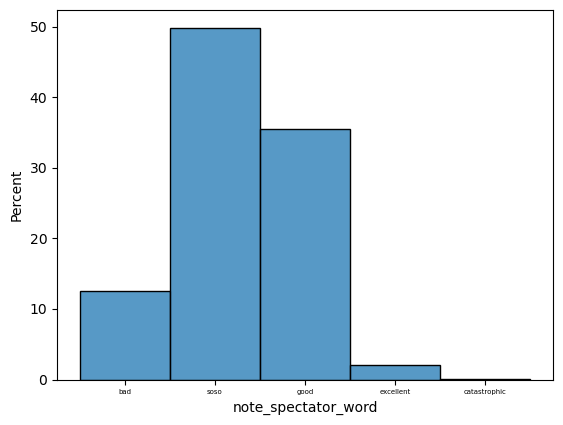

In [37]:
sn.histplot(data=df, x="note_spectator_word", stat="percent")

# Analysis taking into account the success

We will consider only 2 classes in the target variable: 0 or 1 (0 takes catastrophic, bad and soso and 1: good or excellent)
We think it can be logical as what the viewer wants to know is whether the film is good enough to watch or not

In [38]:
df["note_spectators_binary"]= df.note_spectator_word.replace({"catastrophic":0,"bad":0,"soso":0,"good":1,"excellent":1})

In [39]:
df.head()

,Titre,genre1,genre2,réalisateur_1,actor_1,actor_2,actor_3,note_presse,note_spectators,Scenar,...,real_awards,first_actor_awards,second_actor_awards,length_corrected,day,month,year,note_spectator_word,nomi,note_spectators_binary
0,#No_Filter,Epouvante-horreur,Thriller,Michael Dupret,Hannah McIver,Jasmine Daoud,Samuel Van der Zwalmen,NaN,1.6,NaN,...,0.0,0.0,0.0,87,5,mai,2023,bad,0,0
1,13 : La comédie musicale,Drame,Famille,Tamra Davis,Eli Golden,Josh Peck,Debra Messing,NaN,2.6,Robert Horn,...,1.0,0.0,0.0,94,12,août,2022,soso,0,0
2,16 ans,Drame,Romance,Philippe Lioret,Sabrina Levoye,Teïlo Azaïs,Jean-Pierre Lorit,3.2,3.6,Philippe Lioret,...,4.0,0.0,0.0,94,4,janvier,2023,good,1,1
3,1UP,Comédie,NaN,Kyle Newman,Paris Berelc,Taylor Zakhar Perez,Ruby Rose,NaN,2.2,Julia Yorks,...,0.0,0.0,0.0,100,15,juillet,2022,soso,0,0
4,365 jours : Au lendemain,Drame,Erotique,Barbara Bialowas,Michele Morrone,Anna-Maria Sieklucka,Simone Susinna,NaN,1.2,Tomasz Mandes,...,0.0,0.0,0.0,106,27,avril,2022,bad,2,0


By nationality

In [40]:
films=df.groupby(["nationality_1","note_spectator_word"]).note_spectator_word.agg([len])
films

len
nationality_1  note_spectator_word     
Afrique du Sud bad                    6
               good                   3
               soso                   8
Algérie        excellent              1
               soso                   2
...                                 ...
Ukraine        soso                   5
Uruguay        good                   1
               soso                   3
kazakhstan     good                   1
               soso                   1

[193 rows x 1 columns]

In [41]:
top_films=df.loc[(df.note_spectator_word=="excellent")]

In [42]:
top_films

,Titre,genre1,genre2,réalisateur_1,actor_1,actor_2,actor_3,note_presse,note_spectators,Scenar,...,real_awards,first_actor_awards,second_actor_awards,length_corrected,day,month,year,note_spectator_word,nomi,note_spectators_binary
13,"A l'Ouest, rien de nouveau",Drame,Historique,Edward Berger,Felix Kammerer,Albrecht Schuch,Aaron Hilmer,NaN,4.1,Ian Stokell,...,9.0,0.0,1.0,148,28,octobre,2022,excellent,24,1
19,About Kim Sohee,Policier,Drame,July Jung,Doona Bae,Kim Si-eun,Choi Hee-jin,3.8,4.1,July Jung,...,7.0,0.0,0.0,137,5,avril,2023,excellent,2,1
51,As bestas,Drame,Thriller,Rodrigo Sorogoyen,Marina Foïs,Denis Ménochet,Luis Zahera,4.2,4.1,Isabel Peña,...,3.0,1.0,1.0,137,20,juillet,2022,excellent,4,1
61,Avatar : la voie de l'eau,Action,Aventure,James Cameron,Sam Worthington,Zoe Saldana,Sigourney Weaver,4.1,4.3,James Cameron,...,9.0,0.0,0.0,192,14,décembre,2022,excellent,8,1
67,Babylon,Drame,Historique,Damien Chazelle,Brad Pitt,Margot Robbie,Diego Calva,4.0,4.2,Damien Chazelle,...,8.0,14.0,12.0,189,18,janvier,2023,excellent,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3104,The Banker,Drame,NaN,George Nolfi,Samuel L. Jackson,Anthony Mackie,Nia Long,NaN,4.1,Niceole R. Levy,...,0.0,4.0,1.0,120,20,mars,2020,excellent,0,1
3122,The Father,Drame,NaN,Florian Zeller,Anthony Hopkins,Olivia Colman,Mark Gatiss,3.9,4.3,Florian Zeller,...,1.0,7.0,10.0,98,26,mai,2021,excellent,20,1
3124,The Gentlemen,Action,Policier,Guy Ritchie,Matthew McConaughey,Hugh Grant,Charlie Hunnam,3.5,4.1,Guy Ritchie,...,1.0,8.0,4.0,113,5,février,2020,excellent,0,1
3207,Un endroit comme un autre,Drame,NaN,Uberto Pasolini,James Norton,Daniel Lamont,Carol Moore,3.4,4.1,Uberto Pasolini,...,1.0,0.0,0.0,96,8,décembre,2021,excellent,0,1


In [43]:
#Proportion each nationality for excellent films
#We can see that two countries are emerging: France and the USA
films_top=top_films.nationality_1.value_counts()
films_top

U.S.A.                25
France                15
Japon                  6
Grande-Bretagne        4
Allemagne              2
Irlande                2
Iran                   1
Bhoutan                1
Danemark               1
Jordanie               1
Italie                 1
Inde                   1
Chine                  1
Corée du Sud           1
Algérie                1
Pakistan               1
Belgique               1
Espagne                1
Bosnie-Herzégovine     1
Name: nationality_1, dtype: int64

In [44]:
films=df.groupby(["nationality_1","note_spectator_word"]).note_spectator_word.agg([len])
natio = df.groupby(["nationality_1"]).note_spectator_word.agg([len])
percentage= films.div(natio, level="nationality_1")*100

In [45]:
percentage

len
nationality_1  note_spectator_word           
Afrique du Sud bad                  35.294118
               good                 17.647059
               soso                 47.058824
Algérie        excellent            33.333333
               soso                 66.666667
...                                       ...
Ukraine        soso                 55.555556
Uruguay        good                 25.000000
               soso                 75.000000
kazakhstan     good                 50.000000
               soso                 50.000000

[193 rows x 1 columns]

In [46]:
#Percentage film should be seen compared else

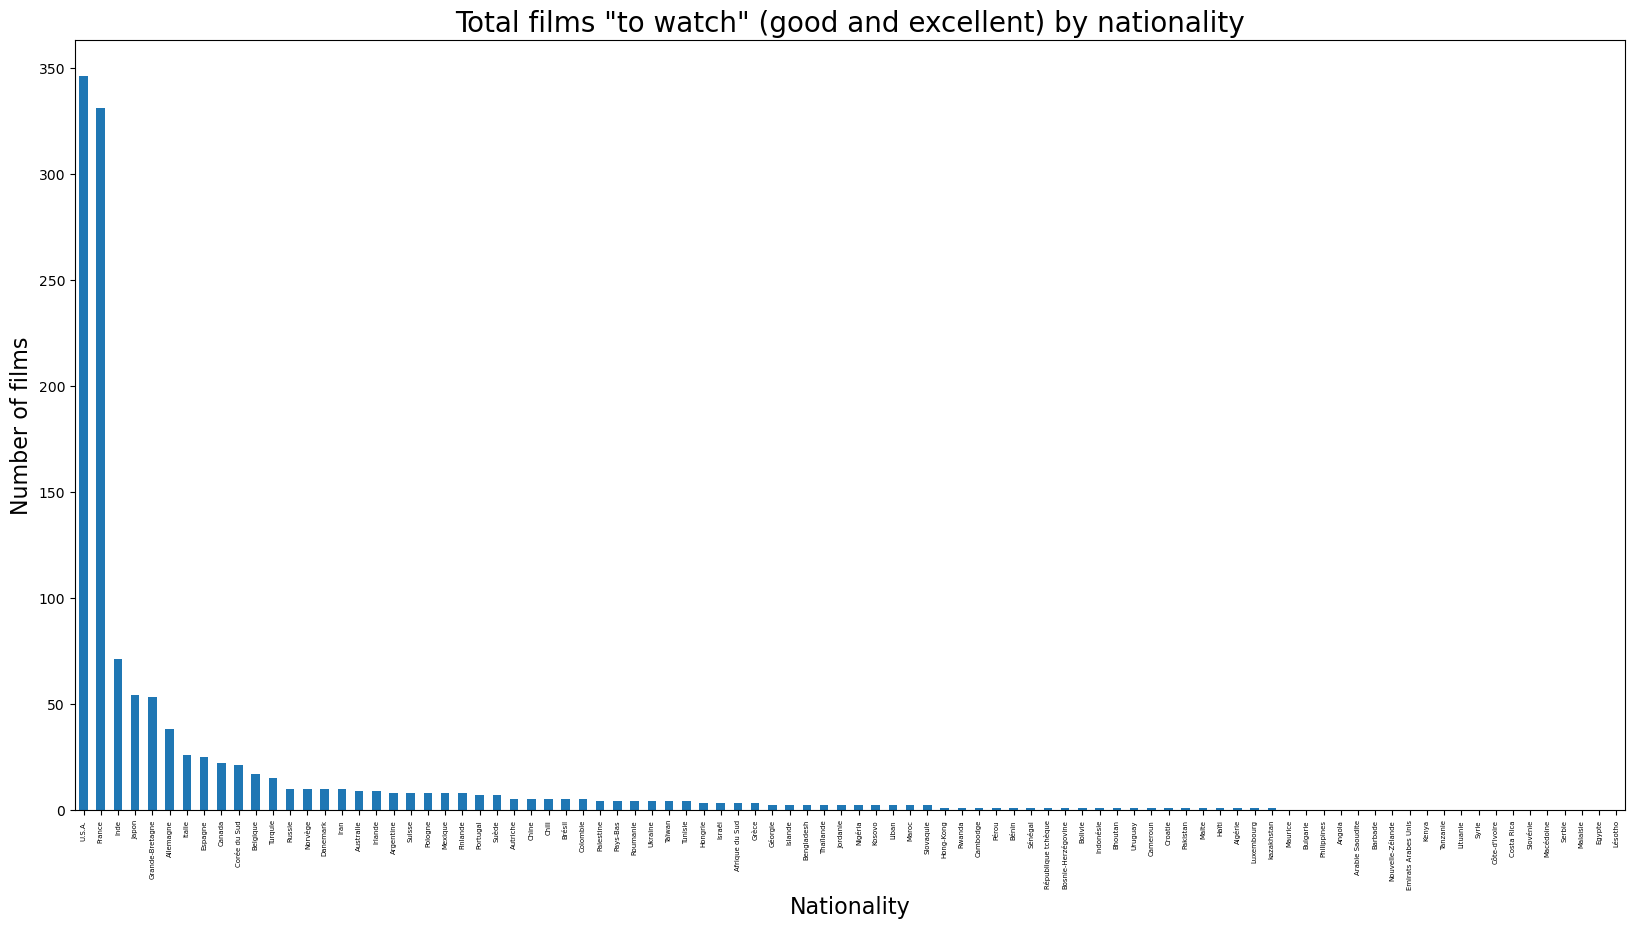

In [47]:
plt.figure(figsize=(20, 10))
df.groupby('nationality_1').note_spectators_binary.sum().sort_values(ascending=False).plot.bar()
plt.title('Total films "to watch" (good and excellent) by nationality', fontsize=20)
plt.xlabel('Nationality', fontsize=16)
plt.ylabel('Number of films', fontsize=16)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.show()


In [48]:
df.note_spectators_binary.value_counts(normalize=True)

0    0.624543
1    0.375457
Name: note_spectators_binary, dtype: float64

In [ ]:
#In percentage with only the most represented ones
sn.barplot(x=percentage.index, y=df.genre1.value_counts(normalize=True)[0:10].values)
plt.title("Most represented genres in the 3 last years")
plt.xlabel("Genre")
plt.ylabel("Percentage of film")
plt.rc('axes', labelsize=10)
plt.rc('xtick', labelsize=5) 
plt.xticks(rotation='vertical')
plt.tight_layout()

# Distribution movie ratings

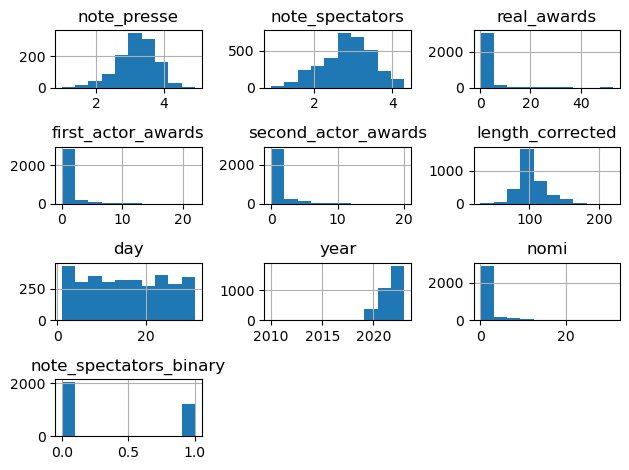

In [49]:
df.hist()
plt.tight_layout()

# Correlation between features and the target variable

In [50]:
df.corrwith(df["note_spectators_binary"])

note_presse               0.401703
note_spectators           0.769967
real_awards               0.077875
first_actor_awards        0.064395
second_actor_awards       0.074429
length_corrected          0.171519
day                      -0.004534
year                      0.035170
nomi                      0.235581
note_spectators_binary    1.000000
dtype: float64

In [51]:
df[df.columns[:]].corr()['note_spectators_binary'][:]

note_presse               0.401703
note_spectators           0.769967
real_awards               0.077875
first_actor_awards        0.064395
second_actor_awards       0.074429
length_corrected          0.171519
day                      -0.004534
year                      0.035170
nomi                      0.235581
note_spectators_binary    1.000000
Name: note_spectators_binary, dtype: float64

We can observe that: note presse is quite related as well as nomi and length_corrected.
However, as one can see, we have no "huge" correlation, this might mean that we are missing some more significant features

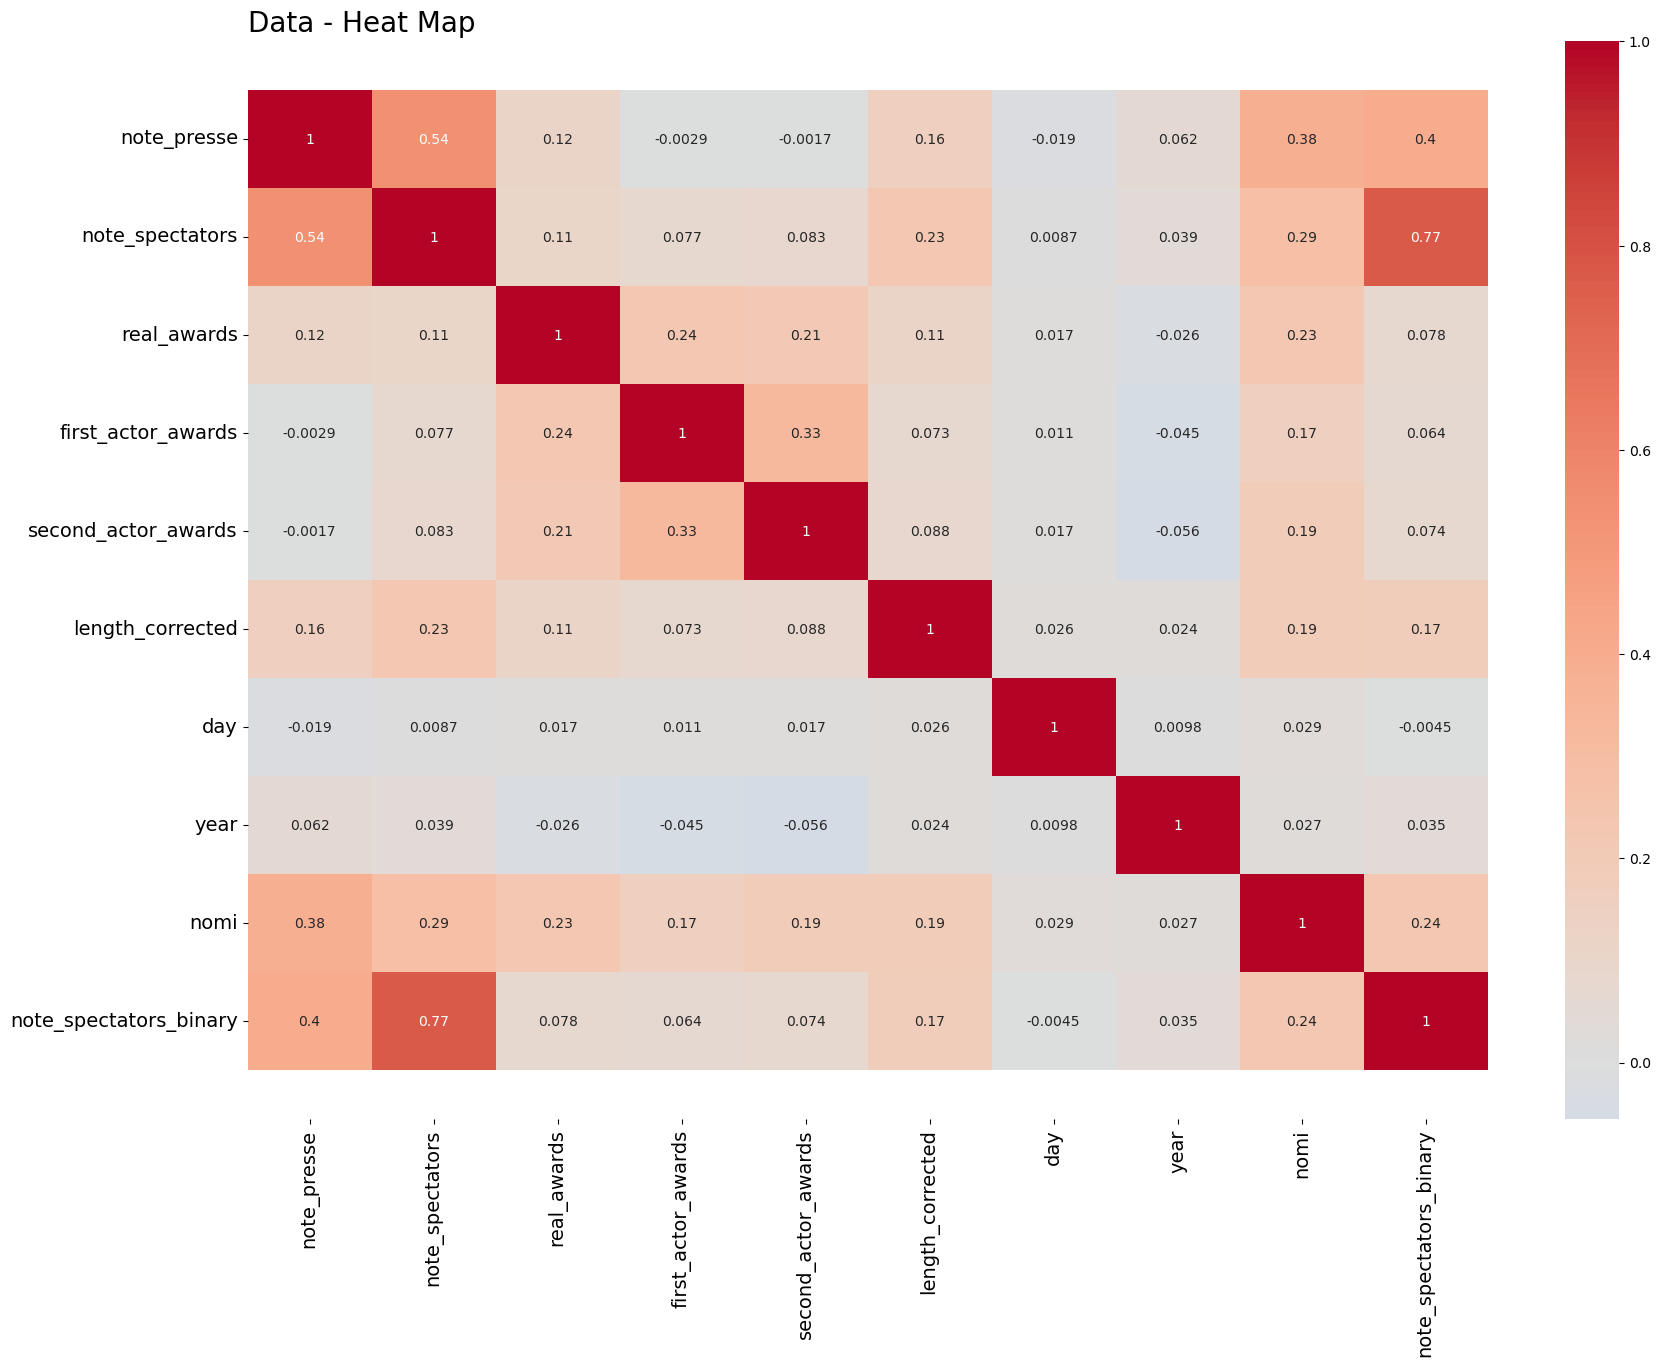

In [52]:
#Heatmap to get all the correlations in a visual way
plt.figure(figsize=(20,14))
ax = sn.heatmap(df.corr(), cmap='coolwarm', center=0, annot=True)
bottom, top = ax.get_ylim()
plt.text(0,-0.6, "Data - Heat Map", fontsize = 20, color='Black')
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0, fontsize=14)
plt.xticks(rotation=90, fontsize=14)
plt.show()

This only gives us information about the numerical data.

In [53]:
df.columns

Index(['Titre', 'genre1', 'genre2', 'réalisateur_1', 'actor_1', 'actor_2',
       'actor_3', 'note_presse', 'note_spectators', 'Scenar', 'nationality_1',
       'distributor', 'language', 'real_awards', 'first_actor_awards',
       'second_actor_awards', 'length_corrected', 'day', 'month', 'year',
       'note_spectator_word', 'nomi', 'note_spectators_binary'],
      dtype='object')

In [54]:
df_bis = df.copy(deep=True)
df_bis

,Titre,genre1,genre2,réalisateur_1,actor_1,actor_2,actor_3,note_presse,note_spectators,Scenar,...,real_awards,first_actor_awards,second_actor_awards,length_corrected,day,month,year,note_spectator_word,nomi,note_spectators_binary
0,#No_Filter,Epouvante-horreur,Thriller,Michael Dupret,Hannah McIver,Jasmine Daoud,Samuel Van der Zwalmen,NaN,1.6,NaN,...,0.0,0.0,0.0,87,5,mai,2023,bad,0,0
1,13 : La comédie musicale,Drame,Famille,Tamra Davis,Eli Golden,Josh Peck,Debra Messing,NaN,2.6,Robert Horn,...,1.0,0.0,0.0,94,12,août,2022,soso,0,0
2,16 ans,Drame,Romance,Philippe Lioret,Sabrina Levoye,Teïlo Azaïs,Jean-Pierre Lorit,3.2,3.6,Philippe Lioret,...,4.0,0.0,0.0,94,4,janvier,2023,good,1,1
3,1UP,Comédie,NaN,Kyle Newman,Paris Berelc,Taylor Zakhar Perez,Ruby Rose,NaN,2.2,Julia Yorks,...,0.0,0.0,0.0,100,15,juillet,2022,soso,0,0
4,365 jours : Au lendemain,Drame,Erotique,Barbara Bialowas,Michele Morrone,Anna-Maria Sieklucka,Simone Susinna,NaN,1.2,Tomasz Mandes,...,0.0,0.0,0.0,106,27,avril,2022,bad,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3279,White Building,Drame,NaN,Kavich Neang,Piseth Chhun,Sithan Hout,Sokha Uk,3.5,2.8,Kavich Neang,...,0.0,0.0,0.0,90,22,décembre,2021,soso,4,0
3280,Who's the Boss,Comédie,Romance,Chinaza Onuzo,Funke Akindele,Blossom Chukwujekwu,Sharon Ooja,NaN,2.9,NaN,...,0.0,0.0,0.0,105,25,octobre,2022,soso,0,0
3281,Why Moths Fly to the Light?,Drame,NaN,Zaur Dzhafarov,Anita Shmatova,Arthur Valente,NaN,NaN,3.0,NaN,...,0.0,0.0,0.0,62,15,mars,2021,soso,0,0
3282,Wildland,Policier,Thriller,Jeanette Nordahl,Sandra Guldberg Kampp,Sidse Babett Knudsen,Joachim Fjelstrup,NaN,1.9,Ingeborg Topsøe,...,0.0,0.0,1.0,88,9,novembre,2021,bad,0,0


In [55]:
#We will use some trick to vizualize whether some features (even if they are categorical) are highly related.
from sklearn.preprocessing import OrdinalEncoder
#This will transform the string into numbers from 1 to n (each different string will have a different number)
categories = ["genre1","genre2","réalisateur_1","actor_1","actor_2","actor_3","Scenar","nationality_1","distributor","language",'month']
ordinal = OrdinalEncoder()
df_bis[categories]= ordinal.fit_transform(df_bis[categories])

In [56]:
df_bis

,Titre,genre1,genre2,réalisateur_1,actor_1,actor_2,actor_3,note_presse,note_spectators,Scenar,...,real_awards,first_actor_awards,second_actor_awards,length_corrected,day,month,year,note_spectator_word,nomi,note_spectators_binary
0,#No_Filter,12.0,22.0,1873.0,947.0,1188.0,2435.0,NaN,1.6,NaN,...,0.0,0.0,0.0,87,5,7.0,2023,bad,0,0
1,13 : La comédie musicale,11.0,13.0,2618.0,680.0,1327.0,664.0,NaN,2.6,2191.0,...,1.0,0.0,0.0,94,12,0.0,2022,soso,0,0
2,16 ans,11.0,20.0,2204.0,2136.0,2572.0,1233.0,3.2,3.6,2078.0,...,4.0,0.0,0.0,94,4,4.0,2023,good,1,1
3,1UP,6.0,NaN,1549.0,1947.0,2561.0,2386.0,NaN,2.2,1347.0,...,0.0,0.0,0.0,100,15,5.0,2022,soso,0,0
4,365 jours : Au lendemain,11.0,10.0,316.0,1744.0,188.0,2551.0,NaN,1.2,2540.0,...,0.0,0.0,0.0,106,27,1.0,2022,bad,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3279,White Building,11.0,NaN,1484.0,2014.0,2439.0,2569.0,3.5,2.8,1415.0,...,0.0,0.0,0.0,90,22,2.0,2021,soso,4,0
3280,Who's the Boss,6.0,20.0,491.0,858.0,360.0,2512.0,NaN,2.9,NaN,...,0.0,0.0,0.0,105,25,10.0,2022,soso,0,0
3281,Why Moths Fly to the Light?,11.0,NaN,2841.0,201.0,248.0,NaN,NaN,3.0,NaN,...,0.0,0.0,0.0,62,15,8.0,2021,soso,0,0
3282,Wildland,22.0,22.0,1260.0,2172.0,2421.0,1272.0,NaN,1.9,1071.0,...,0.0,0.0,1.0,88,9,9.0,2021,bad,0,0


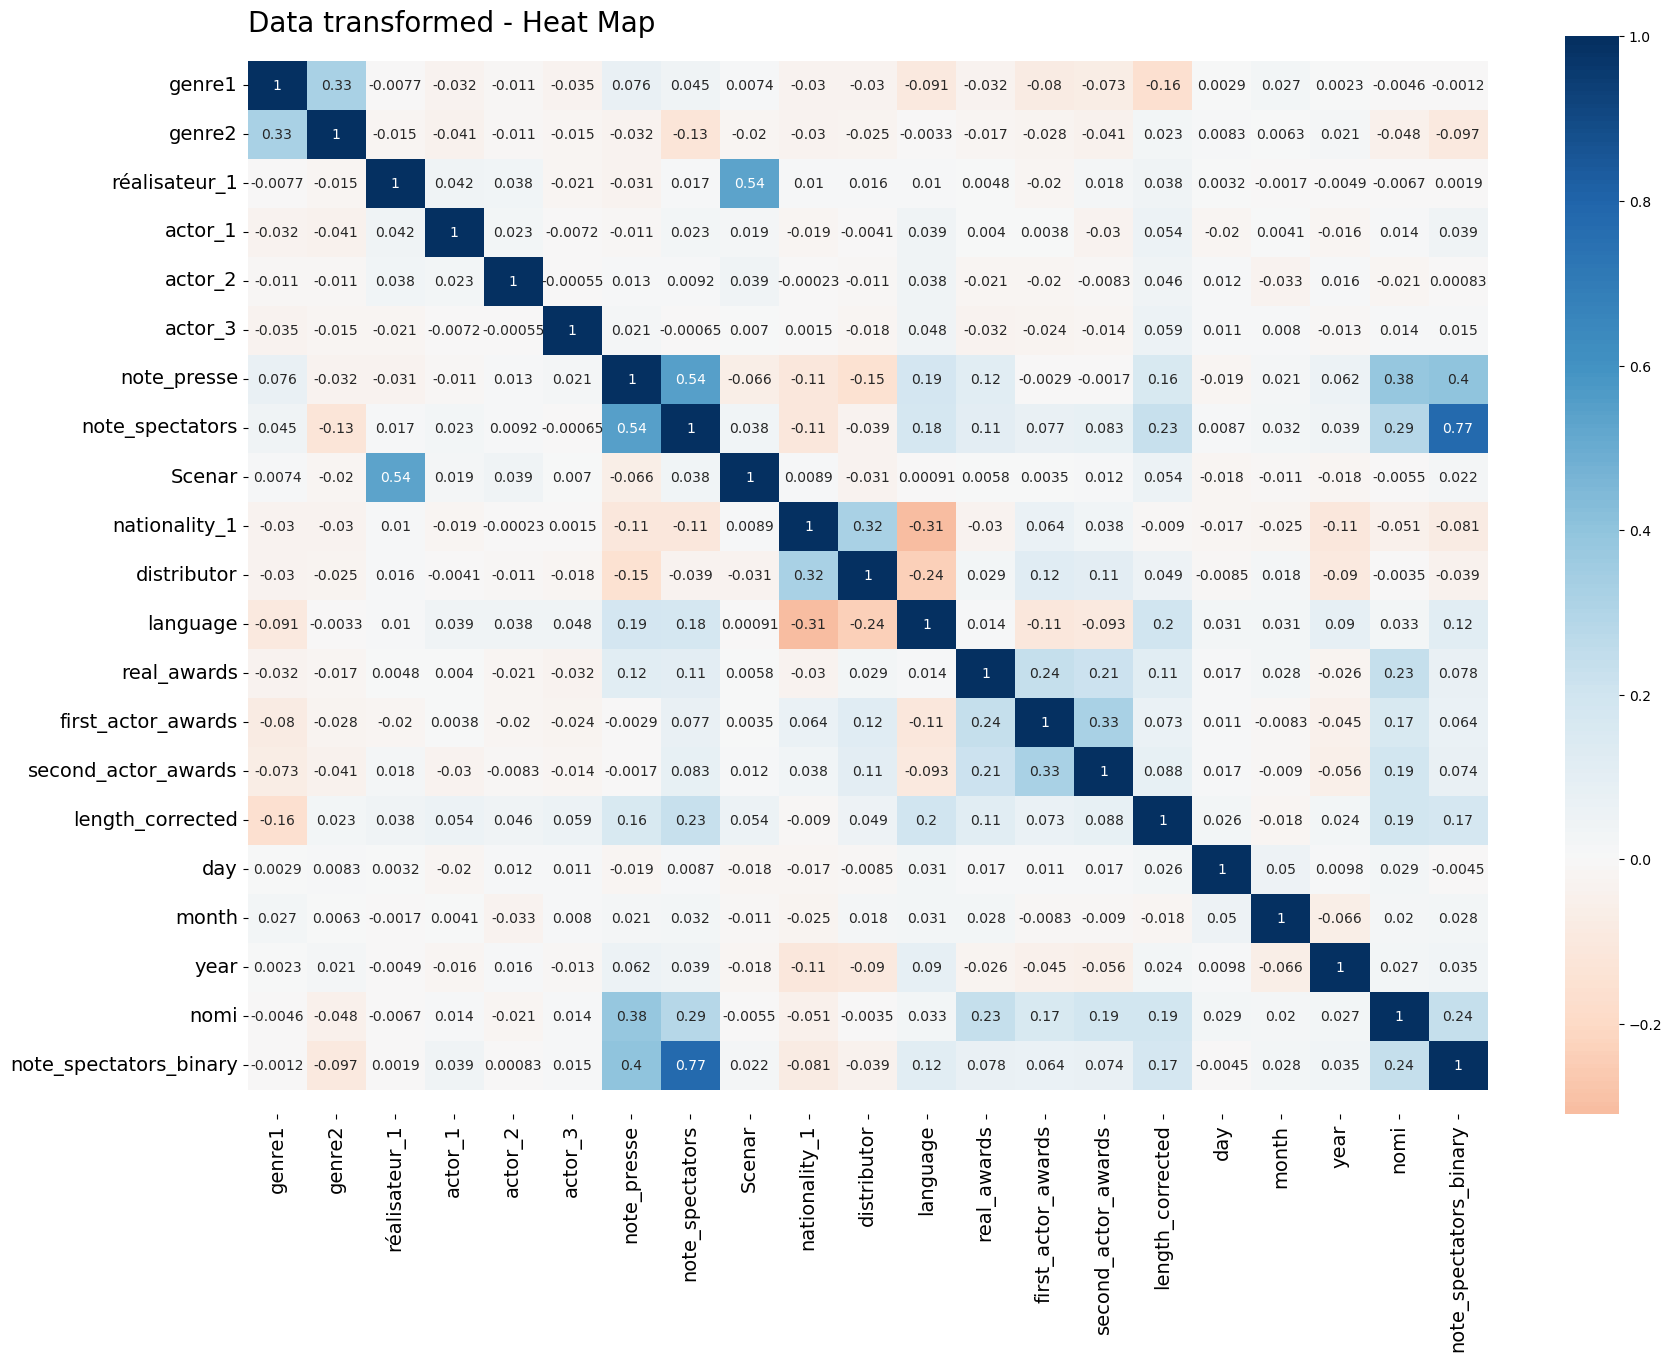

In [57]:
#Heatmap to get all the correlations in a visual way
plt.figure(figsize=(20,14))
ax = sn.heatmap(df_bis.corr(), cmap='RdBu', center=0, annot=True)
bottom, top = ax.get_ylim()
plt.text(0,-0.6, "Data transformed - Heat Map", fontsize = 20, color='Black')
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0, fontsize=14)
plt.xticks(rotation=90, fontsize=14)
plt.show()

In [59]:
df.to_csv('films2020_2021_2022_visu.csv', encoding='utf-8-sig',sep=";", index=False)